In [17]:
import kagglehub
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from iragca.matplotlib import Styles
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

plt.style.use(Styles.CMR10.value)

# Download latest version
path = Path(kagglehub.dataset_download("mjdskaggle/5-years-of-crypto-data-as-of-632024"))

print("Path to dataset files:", path)

Path to dataset files: /home/iragca/.cache/kagglehub/datasets/mjdskaggle/5-years-of-crypto-data-as-of-632024/versions/1


In [2]:
list(path.iterdir())

[PosixPath('/home/iragca/.cache/kagglehub/datasets/mjdskaggle/5-years-of-crypto-data-as-of-632024/versions/1/SOL-USD.csv'),
 PosixPath('/home/iragca/.cache/kagglehub/datasets/mjdskaggle/5-years-of-crypto-data-as-of-632024/versions/1/DOGE-USD.csv'),
 PosixPath('/home/iragca/.cache/kagglehub/datasets/mjdskaggle/5-years-of-crypto-data-as-of-632024/versions/1/XMR-USD.csv'),
 PosixPath('/home/iragca/.cache/kagglehub/datasets/mjdskaggle/5-years-of-crypto-data-as-of-632024/versions/1/BTC-USD.csv'),
 PosixPath('/home/iragca/.cache/kagglehub/datasets/mjdskaggle/5-years-of-crypto-data-as-of-632024/versions/1/USDT-USD.csv'),
 PosixPath('/home/iragca/.cache/kagglehub/datasets/mjdskaggle/5-years-of-crypto-data-as-of-632024/versions/1/BCH-USD.csv'),
 PosixPath('/home/iragca/.cache/kagglehub/datasets/mjdskaggle/5-years-of-crypto-data-as-of-632024/versions/1/ETH-USD.csv'),
 PosixPath('/home/iragca/.cache/kagglehub/datasets/mjdskaggle/5-years-of-crypto-data-as-of-632024/versions/1/XRP-USD.csv'),
 Posix

In [ ]:
data = pd.read_csv(path / "BTC-USD.csv")
df = (
    data.copy().assign(Date=pd.to_datetime(data["Date"]))
)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,8741.747070,8743.500000,8204.185547,8208.995117,8208.995117,22004511436
1,2019-06-04,8210.985352,8210.985352,7564.488770,7707.770996,7707.770996,24609731549
2,2019-06-05,7704.343262,7901.849121,7668.668457,7824.231445,7824.231445,21760923463
3,2019-06-06,7819.633301,7937.340820,7571.471191,7822.023438,7822.023438,19474611077
4,2019-06-07,7826.901367,8126.153320,7788.373535,8043.951172,8043.951172,19141423231
...,...,...,...,...,...,...,...
1823,2024-05-30,67576.085938,69500.539063,67118.078125,68364.992188,68364.992188,29509712534
1824,2024-05-31,68362.515625,68999.562500,66633.421875,67491.414063,67491.414063,27387283769
1825,2024-06-01,67489.609375,67839.765625,67386.195313,67706.937500,67706.937500,11641495604
1826,2024-06-02,67710.273438,68409.164063,67315.523438,67751.601563,67751.601563,17110588415


In [30]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [31]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1828,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1.828000e+03
mean,2021-12-02 12:00:00,29097.730672,29756.051837,28398.041285,29128.598741,29128.598741,3.074250e+10
min,2019-06-03 00:00:00,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,5.331173e+09
25%,2020-09-01 18:00:00,11406.542724,11696.202637,11194.244385,11422.933106,11422.933106,1.883369e+10
50%,2021-12-02 12:00:00,26848.812501,27262.708985,26508.026367,26856.492188,26856.492188,2.717756e+10
75%,2023-03-04 06:00:00,42192.630860,42993.477539,41290.447266,42214.640625,42214.640625,3.783943e+10
max,2024-06-03 00:00:00,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11
std,NaN,17645.189877,18080.192542,17160.398067,17660.598061,17660.598061,1.788234e+10


<Axes: xlabel='Date', ylabel='Close'>

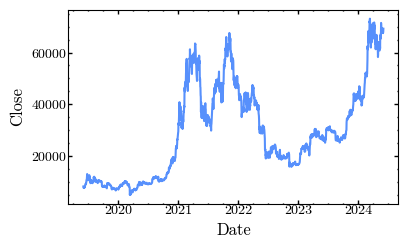

In [32]:
sns.lineplot(data=df, x="Date", y="Close")

In [100]:
adfuller(df["Close"])

(np.float64(-0.8822096289292053),
 np.float64(0.7937745747812965),
 14,
 1813,
 {'1%': np.float64(-3.433962014811523),
  '5%': np.float64(-2.86313550332995),
  '10%': np.float64(-2.5676193929209554)},
 np.float64(30570.395025632475))

<Axes: xlabel='Date', ylabel='pct_change'>

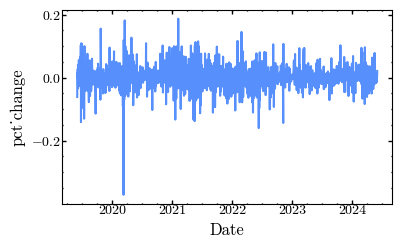

In [33]:
df["pct_change"] = df["Close"].pct_change()
sns.lineplot(data=df, x="Date", y="pct_change")

<Axes: xlabel='Date', ylabel='Close'>

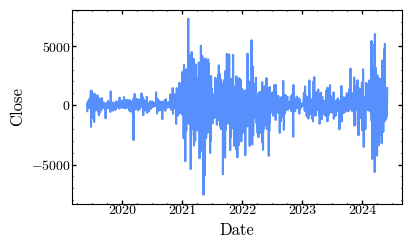

In [34]:
first_difference = df["Close"].diff()
sns.lineplot(data=df, x="Date", y=first_difference)

<Axes: xlabel='Date', ylabel='Close'>

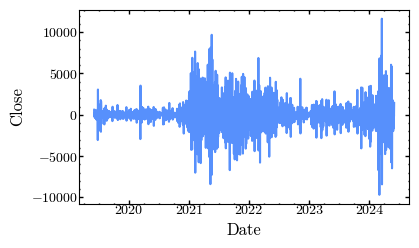

In [35]:
second_difference = first_difference.diff()
sns.lineplot(data=df, x="Date", y=second_difference)

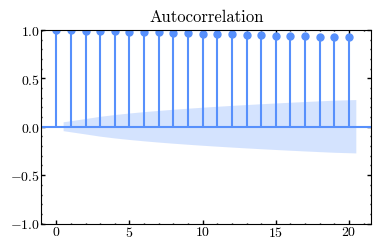

In [36]:
plt.show(plot_acf(df["Close"], lags=20))

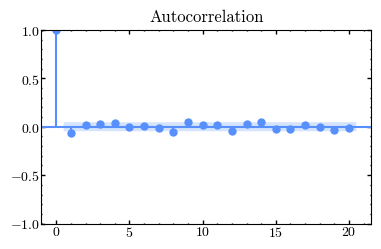

In [38]:
plt.show(plot_acf(first_difference.dropna(), lags=20))

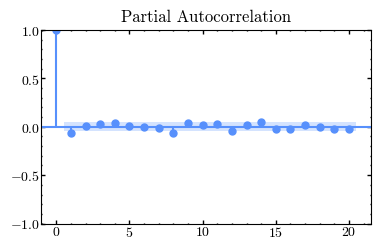

In [39]:
plt.show(plot_pacf(first_difference.dropna(), lags=20))

In [40]:
df["Log_Close"] = np.log(df["Close"])
log_first_difference = df["Log_Close"].diff()

<Axes: xlabel='Date', ylabel='Log_Close'>

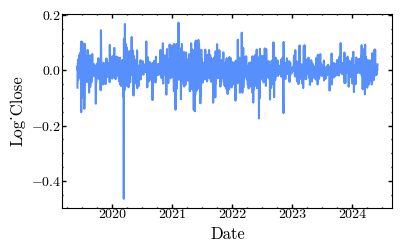

In [41]:
sns.lineplot(data=df, x="Date", y=log_first_difference)

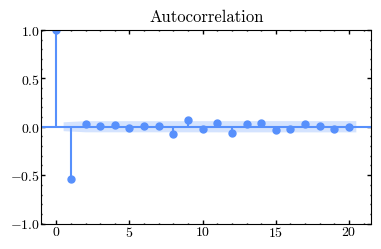

In [42]:
plt.show(plot_acf(second_difference.dropna(), lags=20))

In [18]:
import numpy as np
from scipy.stats import norm

data = np.random.randn(100)

# estimate parameters
mu, sigma = np.mean(data), np.std(data)

# log-likelihood
logL = np.sum(norm.logpdf(data, mu, sigma))

# number of parameters (mu and sigma)
k = 2

AIC = 2*k - 2*logL
print(AIC)


268.4741601329466


<Axes: ylabel='Count'>

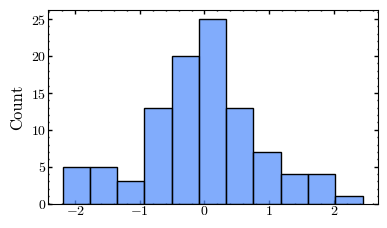

In [20]:
sns.histplot(data)

<Axes: ylabel='Count'>

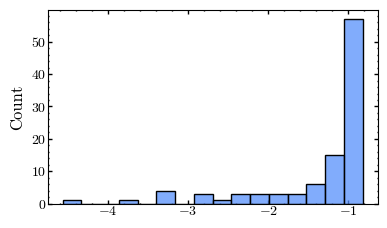

In [25]:
sns.histplot(norm.logpdf(data, mu, sigma))

In [79]:
from itertools import product
from typing import Iterable, Optional
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

class SARIMAOptimizer:

    def __init__(
        self,
        pdq: tuple[Iterable[int], Iterable[int], Iterable[int]],
        PDQ: Optional[tuple[Iterable[int], Iterable[int], Iterable[int]]] = None,
        s: Optional[int] = 0
    ) -> None:
        self.p, self.d, self.q = pdq

        if (PDQ is None and s != 0) or (PDQ is not None and s == 0):
            raise ValueError("Both PDQ and s must be provided for seasonal SARIMA.")

        if PDQ is None and s == 0:
            self.P, self.D, self.Q = (0,), (0,), (0,)
            self.s = 0

        if PDQ is not None and s != 0:
            self.P, self.D, self.Q = PDQ
            self.s = s


    @property
    def order_combinations(self):
        return list(product(self.p, self.d, self.q, self.P, self.D, self.Q))

    def fit(self, data: pd.Series):
        best_aic = float("inf")
        best_model = None
        best_order = None
        best_seasonal_order = None
        aic_results = []

        for (p, d, q, P, D, Q) in tqdm(self.order_combinations):
            try:
                model = SARIMAX(
                    data,
                    order=(p, d, q),
                    seasonal_order=(P, D, Q, self.s)
                ).fit(disp=False)

                aic = model.aic # type: ignore
                aic_results.append(((p, d, q), (P, D, Q), aic))

                if aic < best_aic:
                    best_aic = aic
                    best_model = model
                    best_order = (p, d, q)
                    best_seasonal_order = (P, D, Q, self.s)

            except Exception:
                # You can enable this if debugging
                # print(f"Failed for {(p,d,q,P,D,Q)}: {e}")
                continue

        return {
            "model": best_model,
            "order": best_order,
            "seasonal_order": best_seasonal_order,
            "aic": best_aic,
            "results": aic_results
        }

        

opt = SARIMAOptimizer(
    pdq=(range(0,10), range(1,2), range(0,10)),
)

result = opt.fit(df["Close"].dropna())

print("Best order:", result["order"])
print("Best seasonal_order:", result["seasonal_order"])
print("Best AIC:", result["aic"])


100%|██████████| 100/100 [14:54<00:00,  8.95s/it]

Best order: (2, 1, 6)
Best seasonal_order: (0, 0, 0, 0)
Best AIC: 30961.563606096024


In [77]:
result["results"]

[((0, 1, 0), (0, 0, 0), np.float64(30980.49672650288)),
 ((0, 1, 1), (0, 0, 0), np.float64(30975.7068881171)),
 ((0, 1, 2), (0, 0, 0), np.float64(30977.073906540798)),
 ((1, 1, 0), (0, 0, 0), np.float64(30975.494193135466)),
 ((1, 1, 1), (0, 0, 0), np.float64(30977.37271078077)),
 ((1, 1, 2), (0, 0, 0), np.float64(30976.33888139318)),
 ((2, 1, 0), (0, 0, 0), np.float64(30977.250740894415)),
 ((2, 1, 1), (0, 0, 0), np.float64(30976.839907731104)),
 ((2, 1, 2), (0, 0, 0), np.float64(30973.73512131371))]

In [81]:
result["model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1828
Model:               SARIMAX(2, 1, 6)   Log Likelihood              -15471.782
Date:                Fri, 12 Dec 2025   AIC                          30961.564
Time:                        09:44:10   BIC                          31011.157
Sample:                             0   HQIC                         30979.857
                               - 1828                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2124      0.019    -11.095      0.000      -0.250      -0.175
ar.L2         -0.9264      0.018    -50.757      0.000      -0.962      -0.891
ma.L1          0.1505      0.025      6.102      0.000       0.102       0.199
ma.L2          0.9451      0.025     37.698      0.000       0.896       0.994
ma.L3         -0.0191      0.025     -0.773      0.440      -0.067       0.029
ma.L4          0.0690      0.022      3.082      0.002       0.025       0.113
ma.L5          0.0430      0.019      2.281      0.023       0.006       0.080
ma.L6          0.0734      0.017      4.423      0.000       0.041       0.106
sigma2      1.355e+06   2.29e+04     59.043      0.000    1.31e+06     1.4e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3107.54
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.27   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

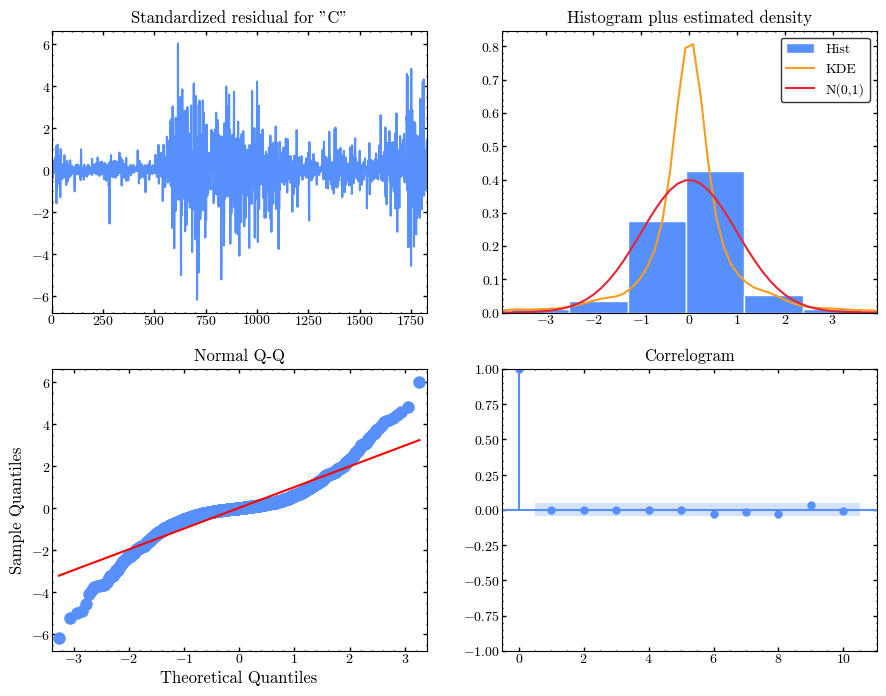

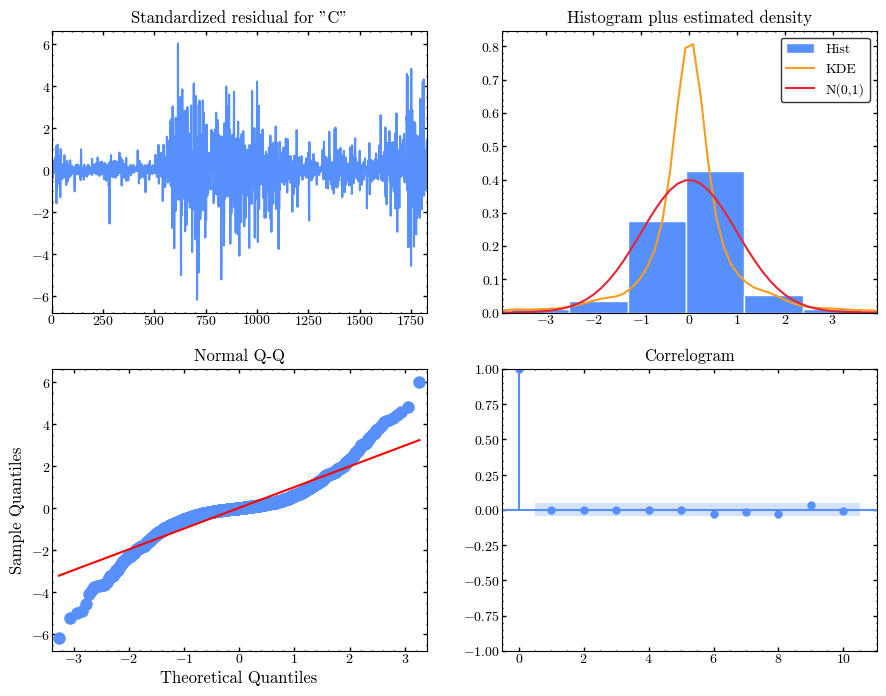

In [83]:
result["model"].plot_diagnostics(figsize=(10, 8))

In [84]:
result["model"].nobs

1828

<Axes: xlabel='Date', ylabel='Close'>

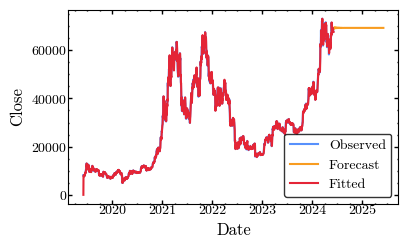

In [102]:
n_forecast = 365
pred = result["model"].get_forecast(steps=n_forecast)
fitted = result["model"].get_prediction(start=0, end=result["model"].nobs - 1).predicted_mean

prediction_date_range = pd.date_range(
    start=df["Date"].max() + pd.DateOffset(days=1),
    end=df["Date"].max() + pd.DateOffset(days=n_forecast),
    freq='D'
)

sns.lineplot(data=df, x="Date", y="Close", label="Observed")
sns.lineplot(x=prediction_date_range, y=pred.predicted_mean, label="Forecast")
sns.lineplot(x=df["Date"], y=fitted, label="Fitted")

In [103]:
pd.date_range(
    start=df["Date"].max() + pd.DateOffset(days=1),
    end=df["Date"].max() + pd.DateOffset(days=n_forecast),
    freq='D'
)


DatetimeIndex(['2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07',
               '2024-06-08', '2024-06-09', '2024-06-10', '2024-06-11',
               '2024-06-12', '2024-06-13',
               ...
               '2025-05-25', '2025-05-26', '2025-05-27', '2025-05-28',
               '2025-05-29', '2025-05-30', '2025-05-31', '2025-06-01',
               '2025-06-02', '2025-06-03'],
              dtype='datetime64[ns]', length=365, freq='D')

In [108]:
pd.date_range(
    start=df["Date"].max() + pd.DateOffset(days=1),
    periods=n_forecast,
    freq='D'
)


DatetimeIndex(['2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07',
               '2024-06-08', '2024-06-09', '2024-06-10', '2024-06-11',
               '2024-06-12', '2024-06-13',
               ...
               '2025-05-25', '2025-05-26', '2025-05-27', '2025-05-28',
               '2025-05-29', '2025-05-30', '2025-05-31', '2025-06-01',
               '2025-06-02', '2025-06-03'],
              dtype='datetime64[ns]', length=365, freq='D')

In [94]:
result["model"].fittedvalues

0           0.000000
1        7915.236383
2        7816.910556
3        7979.184926
4        8021.804625
            ...     
1823    67561.227993
1824    68151.113839
1825    67556.249331
1826    67819.487098
1827    67620.369404
Length: 1828, dtype: float64

## Exponential Smoothing

In [109]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import ExponentialSmoothing as holtwinters_ES  # Multiplicative,  with Trend (trend=True), Seasonality, (seasonal=12)
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing # Additive, with Trend (trend=True), Seasonality, (seasonal=12)

### Level

In [ ]:
model = SimpleExpSmoothing(df["Close"]).fit(smoothing_level=0.4)
model.summary()

Dep. Variable:,Close,No. Observations:,1828
Model:,SimpleExpSmoothing,SSE,3707271752.046
Optimized:,False,AIC,26551.284
Trend:,None,BIC,26562.306
Seasonal:,None,AICC,26551.306
Seasonal Periods:,None,Date:,"Fri, 12 Dec 2025"
Box-Cox:,False,Time:,13:06:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4000000,alpha,False
initial_level,8208.9951,l.0,False


In [113]:
pred = model.forecast(365)

<Axes: xlabel='None', ylabel='None'>

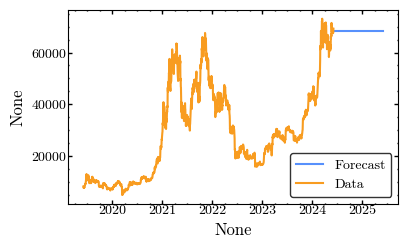

In [ ]:
sns.lineplot(x=prediction_date_range, y=pred, label="Forecast")
sns.lineplot(data=df, x="Date", y="Close", label="Data")

### Trend

<Axes: xlabel='None', ylabel='None'>

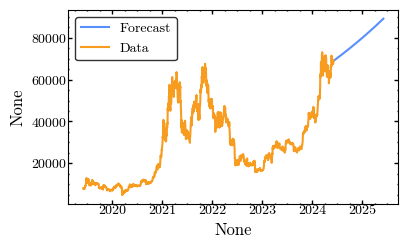

In [123]:
model = holtwinters_ES(df["Close"], trend="mul").fit(smoothing_level=0.8)
pred = model.forecast(steps=n_forecast)

sns.lineplot(x=prediction_date_range, y=pred, label="Forecast")
sns.lineplot(data=df, x="Date", y="Close", label="Data")

### Seasonal

In [145]:
print("Training data until:", df["Date"].max())

Training data until: 2024-06-03 00:00:00


Text(0, 0.5, 'Close Price (USD)')

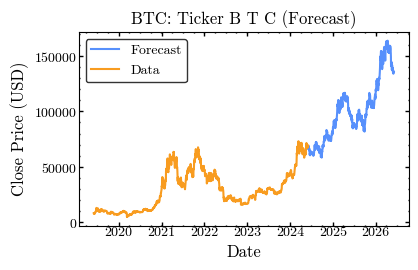

In [143]:
model = holtwinters_ES(df["Close"], trend="mul", seasonal="mul", seasonal_periods=365).fit(smoothing_level=0.8)
pred = model.forecast(steps=n_forecast*2)

prediction_date_range = pd.date_range(
    start=df["Date"].max() + pd.DateOffset(days=1),
    end=df["Date"].max() + pd.DateOffset(days=n_forecast*2),
    freq='D'
)

sns.lineplot(x=prediction_date_range, y=pred, label="Forecast")
sns.lineplot(data=df, x="Date", y="Close", label="Data")
plt.title("BTC: Ticker B T C (Forecast)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")

In [144]:
print("Tippity top: ", prediction_date_range[pred.argmax()])

Tippity top:  2026-04-12 00:00:00


https://api.coingecko.com/api/v3/simple/price?vs_currencies=usd&ids=bitcoin&x_cg_demo_api_key=CG-QV2y3xLwxvqkHKs2edTg12hh

In [160]:
import requests
from urllib.parse import urljoin, urlencode


API = "https://api.coingecko.com/api/v3/coins/{id}/market_chart"

def build_url(coin_id: str, api_key: str, days: int) -> str:
    params = urlencode({"x_cg_demo_api_key": api_key, "days": days, "vs_currency": "usd"})
    
    return f"{API.format(id=coin_id)}?{params}"


response = requests.get(build_url("bitcoin", "CG-QV2y3xLwxvqkHKs2edTg12hh", 365))
data = response.json()
data


{'prices': [[1734048000000, 100000.80836535197],
  [1734134400000, 101352.22971292294],
  [1734220800000, 101367.01064553364],
  [1734307200000, 104721.50151808978],
  [1734393600000, 106074.10723541168],
  [1734480000000, 106034.913402645],
  [1734566400000, 100355.5761481501],
  [1734652800000, 97851.35377075805],
  [1734739200000, 97691.43431692653],
  [1734825600000, 97202.82496847633],
  [1734912000000, 95094.27394862173],
  [1734998400000, 94644.91085464321],
  [1735084800000, 98695.71400782601],
  [1735171200000, 99344.95417367229],
  [1735257600000, 95678.31244565405],
  [1735344000000, 94331.94727053077],
  [1735430400000, 95184.61945288602],
  [1735516800000, 93663.44751964067],
  [1735603200000, 92627.28213113277],
  [1735689600000, 93507.85874741491],
  [1735776000000, 94384.1761153871],
  [1735862400000, 96852.14681235075],
  [1735948800000, 98084.34279280754],
  [1736035200000, 98256.73876849933],
  [1736121600000, 98364.58946599838],
  [1736208000000, 102229.39453189743]

In [164]:
formatted_data = [{"Date": pd.to_datetime(item[0], unit='ms'), "Price": item[1]} for item in data["prices"]]
formatted = pd.DataFrame(formatted_data)
formatted

,Date,Price
0,2024-12-13 00:00:00,100000.808365
1,2024-12-14 00:00:00,101352.229713
2,2024-12-15 00:00:00,101367.010646
3,2024-12-16 00:00:00,104721.501518
4,2024-12-17 00:00:00,106074.107235
...,...,...
361,2025-12-09 00:00:00,90618.053520
362,2025-12-10 00:00:00,92723.213721
363,2025-12-11 00:00:00,92005.137150
364,2025-12-12 00:00:00,92494.176916


In [165]:
concatenated = pd.concat([df, formatted.rename(columns={"Price": "Close"})], axis=0)
concatenated

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,Log_Close
0,2019-06-03 00:00:00,8741.747070,8743.500000,8204.185547,8208.995117,8208.995117,2.200451e+10,NaN,9.012986
1,2019-06-04 00:00:00,8210.985352,8210.985352,7564.488770,7707.770996,7707.770996,2.460973e+10,-0.061058,8.949984
2,2019-06-05 00:00:00,7704.343262,7901.849121,7668.668457,7824.231445,7824.231445,2.176092e+10,0.015109,8.964981
3,2019-06-06 00:00:00,7819.633301,7937.340820,7571.471191,7822.023438,7822.023438,1.947461e+10,-0.000282,8.964699
4,2019-06-07 00:00:00,7826.901367,8126.153320,7788.373535,8043.951172,8043.951172,1.914142e+10,0.028372,8.992676
...,...,...,...,...,...,...,...,...,...
361,2025-12-09 00:00:00,NaN,NaN,NaN,90618.053520,NaN,NaN,NaN,NaN
362,2025-12-10 00:00:00,NaN,NaN,NaN,92723.213721,NaN,NaN,NaN,NaN
363,2025-12-11 00:00:00,NaN,NaN,NaN,92005.137150,NaN,NaN,NaN,NaN
364,2025-12-12 00:00:00,NaN,NaN,NaN,92494.176916,NaN,NaN,NaN,NaN


In [212]:
print("Training data until:", df["Date"].max())

Training data until: 2024-06-03 00:00:00


Text(0, 0.5, 'Close Price (USD)')

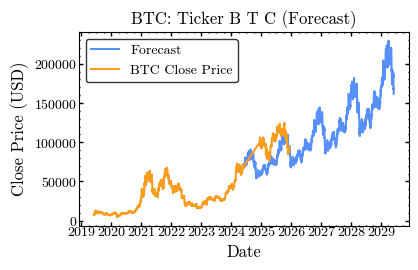

In [231]:
model = holtwinters_ES(
    df["Close"], 
    trend="mul", 
    seasonal="mul", 
    seasonal_periods=420
).fit(smoothing_level=0.8, damping_trend=0.6)
pred = model.forecast(steps=n_forecast*5)

prediction_date_range = pd.date_range(
    start=df["Date"].max() + pd.DateOffset(days=1),
    end=df["Date"].max() + pd.DateOffset(days=n_forecast*5),
    freq='D'
)

sns.lineplot(x=prediction_date_range, y=pred, label="Forecast")
sns.lineplot(data=concatenated, x="Date", y="Close", label="BTC Close Price")
plt.title("BTC: Ticker B T C (Forecast)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")

In [225]:
print("Tippity top: ", prediction_date_range[pred.argmax()])

Tippity top:  2025-10-18 00:00:00
